In [3]:
# !pip install networkx 
# !pip install numpy
# !pip install matplotlib
!pip install seaborn

In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

### Problem 1

[[0, 0, 1, 2], [0, 3, 4, 5], [6, 7, 8, 9], [0, 0, 0, 10]]


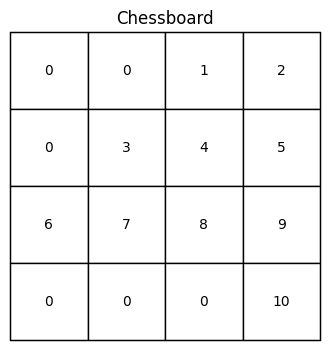

In [5]:
# display chessboard
n = 4
chessboard = [[0] * n for _ in range(n)]

chessboard[0][2] = 1
chessboard[0][3] = 2
chessboard[1][1] = 3
chessboard[1][2] = 4
chessboard[1][3] = 5
chessboard[2][0] = 6
chessboard[2][1] = 7
chessboard[2][2] = 8
chessboard[2][3] = 9
chessboard[3][3] = 10

def draw_chessboard(chessboard):
    chessboard = np.array(chessboard)
    rows, cols    = chessboard.shape

    # Create figure of the size of the maze
    fig = plt.figure(1, figsize=(cols, rows))

    # Remove the axis ticks and add title
    ax = plt.gca()
    ax.set_title('Chessboard')
    ax.set_xticks([])
    ax.set_yticks([])

    # Create figure of the size of the maze
    fig = plt.figure(1, figsize=(cols, rows))

    # Create a table to color
    grid = plt.table(cellText=chessboard,
                            cellColours=None,
                            cellLoc='center',
                            loc=(0, 0),
                            edges='closed')
    # Modify the hight and width of the cells in the table
    tc = grid.properties()['children']
    for cell in tc:
        cell.set_height(1.0/rows)
        cell.set_width(1.0/cols)

draw_chessboard(chessboard)
print(chessboard)

In [6]:
# Compute the edges
valid_indices = []
for row_idx in range(n):
    for col_idx in range(n):
        if chessboard[row_idx][col_idx] == 0:
            continue
        else:
            valid_indices.append((row_idx, col_idx))


def out_of_bound(chessboard, pos,n):
    x,y = pos
    return True if x < 0 or x >= n or y < 0 or y >= n or chessboard[x][y] == 0 else False


Adjacency_list = {} # dict{1:[7,9], 2:[3,8], ...}
directions = [(2,1),(-2,1),(-2,-1),(2,-1),(1,2),(1,-2),(-1,2),(-1,-2)]
pos_move = tuple()

for row_idx, col_idx in valid_indices:
    Adjacency_list[chessboard[row_idx][col_idx]] = []
    for dir in directions:
        pos_move = (row_idx + dir[0], col_idx + dir[1])
        if out_of_bound(chessboard, pos_move, n):
            continue
        else:
            Adjacency_list[chessboard[row_idx][col_idx]].append(chessboard[pos_move[0]][pos_move[1]])

print(Adjacency_list)




{1: [9, 7], 2: [8, 3], 3: [9, 2], 4: [10, 6], 5: [7], 6: [4], 7: [1, 10, 5], 8: [2], 9: [1, 3], 10: [4, 7]}


In [7]:
Adjacency_matrix = np.zeros((10,10))
for key in Adjacency_list.keys():
    for value in Adjacency_list[key]:
        Adjacency_matrix[key - 1][value - 1] = 1

print(Adjacency_matrix)

[[0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]]


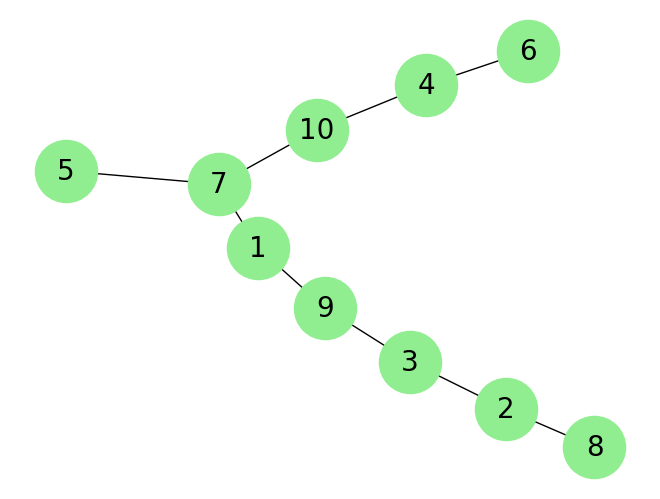

In [8]:
# create the graph
G = nx.Graph(Adjacency_list)
nx.draw(G, pos = None, ax = None, with_labels = True,font_size = 20, node_size = 2000, node_color = 'lightgreen')


### Problem 3

In [61]:

# Construct the graph
G = nx.DiGraph()

# Adding nodes
G.add_node('v1')
G.add_node('v2')
G.add_node('v3')
G.add_node('v4')
G.add_node('v5')
G.add_node('v6')
G.add_node('v7')
G.add_node('v8')


# Adding weighted edges
G.add_edge('v1', 'v2', weight=6)
G.add_edge('v1', 'v8', weight=2)
G.add_edge('v1', 'v5', weight=5)

G.add_edge('v2', 'v1', weight=2)
G.add_edge('v2', 'v3', weight=3)

G.add_edge('v3', 'v5', weight=2)

G.add_edge('v5', 'v1', weight=5)
G.add_edge('v5', 'v6', weight=60)
G.add_edge('v5', 'v8', weight=3)

G.add_edge('v6', 'v4', weight=1)

G.add_edge('v8', 'v4', weight=100)
G.add_edge('v8', 'v7', weight=3)
G.add_edge('v8', 'v1', weight=5)
G.add_edge('v8', 'v6', weight=90)



In [63]:
# Q.decreaseKey(v, dv)
def decreaseKey(v, dv, hq):
    for pair in hq:
        if pair[1] == v:
            # delete this pair and modify
            hq.remove(pair)
            pair[0] = dv
            # add new pair
            hq.append(pair)
    # print(hq)
    return hq

            

In [64]:
''' pesudo code
Q = an empty priority queue
for all v in V:
	Q.insert(v, +inf)
Let D be a dictionary and set D[v] = +inf for all v in V
Q.decreaseKey(s, 0)
D[s] = 0
While Q.isEmpty() == False:
	(u,d) = Q.deleteMin()
	for all v in out-neighbors(u):
		dv = d + w_{uv}
		if dv < D[v]:
			Q.decreaseKey(v, dv)
			D[v] = dv
'''


' pesudo code\nQ = an empty priority queue\nfor all v in V:\n\tQ.insert(v, +inf)\nLet D be a dictionary and set D[v] = +inf for all v in V\nQ.decreaseKey(s, 0)\nD[s] = 0\nWhile Q.isEmpty() == False:\n\t(u,d) = Q.deleteMin()\n\tfor all v in out-neighbors(u):\n\t\tdv = d + w_{uv}\n\t\tif dv < D[v]:\n\t\t\tQ.decreaseKey(v, dv)\n\t\t\tD[v] = dv\n'

In [85]:
import heapq
table = []
table.append(['Iteration', 'expanded' + '\n' + 'vertex', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8'])
Q = []
D = dict()
heapq.heapify(Q)
start_node = 'v2'
end_node = 'v4'
nodes = G.nodes()

# initialization
iteration = 0
for v in G.nodes():
    if v == start_node:
        heapq.heappush(Q, [0, v])
        D[v] = 0
    else:
        heapq.heappush(Q, [float('inf'), v])
        D[v] = float('inf')
table.append([iteration, '-'] + [D[node] if D[node] != float('inf') else '+∞' for node in G.nodes()])


while len(Q) != 0: 
    iteration += 1
    print('iteration', iteration)
    print(Q)
    heapq.heapify(Q)
    d, u = heapq.heappop(Q)
    print('expanded vertex', u)
    expanded_vertex = u
    out_neighbors = list(G.successors(u))
    for v in out_neighbors:
        dv = d + G[u][v]['weight']
        if dv < D[v]:
            print('vertex',v,'is modified from', D[v], 'to', dv)
            Q = decreaseKey(v, dv, Q)
            print('heap', Q)
            D[v] = dv
    table.append([iteration, expanded_vertex] + [D[node] if D[node] != float('inf') else '+∞' for node in G.nodes()])
print('shortest path from v2 to v4', D['v4'])




iteration 1
[[0, 'v2'], [inf, 'v1'], [inf, 'v3'], [inf, 'v4'], [inf, 'v5'], [inf, 'v6'], [inf, 'v7'], [inf, 'v8']]
expanded vertex v2
vertex v1 is modified from inf to 2
heap [[inf, 'v4'], [inf, 'v3'], [inf, 'v8'], [inf, 'v5'], [inf, 'v6'], [inf, 'v7'], [2, 'v1']]
vertex v3 is modified from inf to 3
heap [[inf, 'v4'], [inf, 'v8'], [inf, 'v5'], [inf, 'v6'], [inf, 'v7'], [2, 'v1'], [3, 'v3']]
iteration 2
[[inf, 'v4'], [inf, 'v8'], [inf, 'v5'], [inf, 'v6'], [inf, 'v7'], [2, 'v1'], [3, 'v3']]
expanded vertex v1
vertex v8 is modified from inf to 4
heap [[3, 'v3'], [inf, 'v6'], [inf, 'v4'], [inf, 'v7'], [inf, 'v5'], [4, 'v8']]
vertex v5 is modified from inf to 7
heap [[3, 'v3'], [inf, 'v6'], [inf, 'v4'], [inf, 'v7'], [4, 'v8'], [7, 'v5']]
iteration 3
[[3, 'v3'], [inf, 'v6'], [inf, 'v4'], [inf, 'v7'], [4, 'v8'], [7, 'v5']]
expanded vertex v3
vertex v5 is modified from 7 to 5
heap [[4, 'v8'], [inf, 'v4'], [inf, 'v7'], [inf, 'v6'], [5, 'v5']]
iteration 4
[[4, 'v8'], [inf, 'v4'], [inf, 'v7'], [i

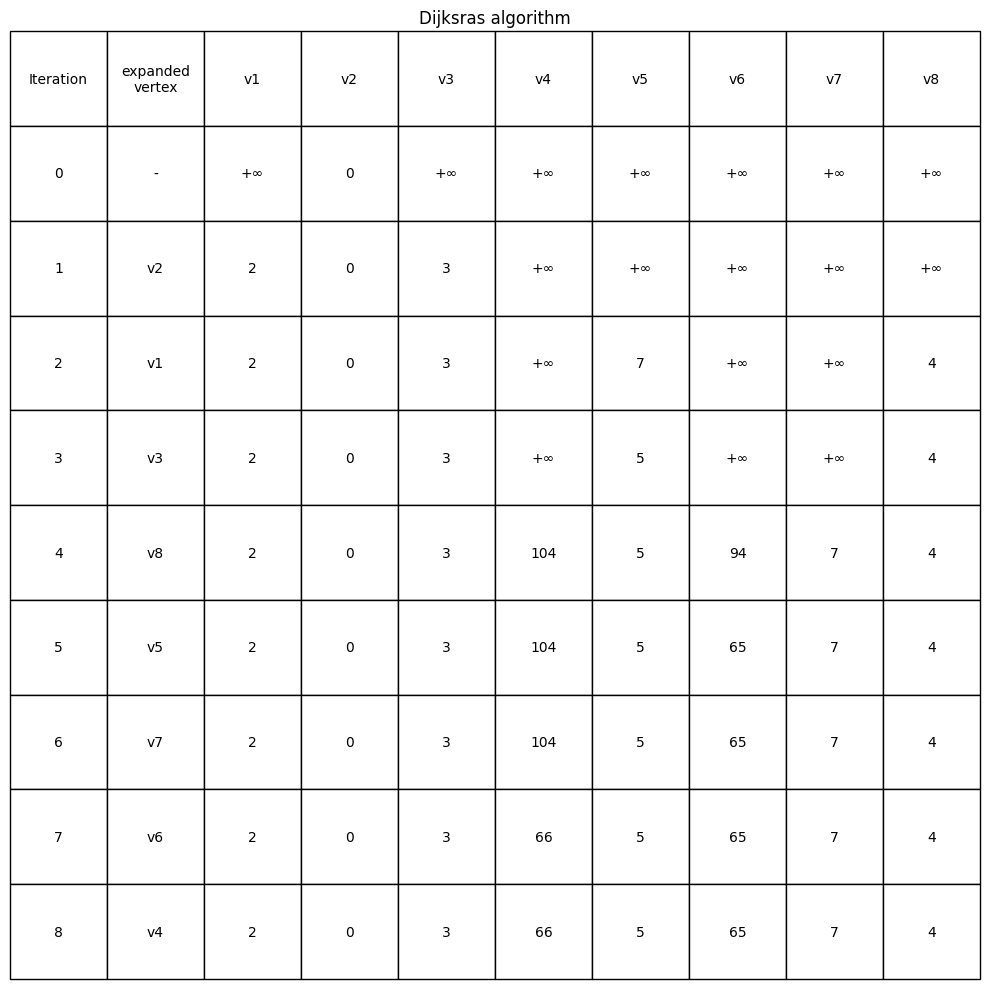

In [86]:
# display 
def draw_table(table):
    table = np.array(table)
    rows, cols = table.shape

    # Create figure of the size of the maze
    fig = plt.figure(1, figsize=(cols, rows))

    # Remove the axis ticks and add title
    ax = plt.gca()
    ax.set_title('Dijksras algorithm')
    ax.set_xticks([])
    ax.set_yticks([])

    # Create figure of the size of the maze
    fig = plt.figure(1, figsize=(cols, rows))

    # Create a table to color
    grid = plt.table(cellText=table,
                            cellColours=None,
                            cellLoc='center',
                            loc=(0, 0),
                            edges='closed')
    # Modify the hight and width of the cells in the table
    tc = grid.properties()['children']
    for cell in tc:
        cell.set_height(1.0/rows)
        cell.set_width(1.0/cols)
    
    grid.auto_set_font_size(False)
    grid.set_fontsize(10)
    # Hide axes
    ax.axis('off')
    plt.savefig('dijksras algorithm')
    plt.show()

draw_table(table)


### Problem 4

In [6]:
class Tree:
    def __init__(self, node):
        self.node = node
        self.leftchildren = None
        self.rightchildren = None
        


In [7]:
node = dict()
node['v0'] = Tree(20)
node['v0'].leftchildren = ['v1', 'v2']
node['v0'].rightchildren = ['v3', 'v4']

node['v1'] = Tree(5)
node['v1'].leftchildren = ['v5', 'v6']
node['v1'].rightchildren = ['v7', 'v8']

node['v2'] = Tree(16)
node['v2'].leftchildren = ['v9', 'v10']
node['v2'].rightchildren = ['v11', 'v12']

node['v3'] = Tree(30)
node['v3'].leftchildren = ['v13', 'v14']
node['v3'].rightchildren = ['v15', 'v16']

node['v4'] = Tree(80)
node['v4'].leftchildren = ['v17', 'v18']
node['v4'].rightchildren = ['v19', 'v20']


node['v5'] = Tree(1)
node['v6'] = Tree(2)
node['v7'] = Tree(8)
node['v8'] = Tree(9)
node['v9'] = Tree(10)
node['v10'] = Tree(13)
node['v11'] = Tree(17)
node['v12'] = Tree(19)
node['v13'] = Tree(23)
node['v14'] = Tree(25)
node['v15'] = Tree(40)
node['v16'] = Tree(45)
node['v17'] = Tree(61)
node['v18'] = Tree(65)
node['v19'] = Tree(100)
node['v20'] = Tree(101)



print(node['v2'].rightchildren)
print(node['v5'].rightchildren)



['v11', 'v12']
None


In [22]:
def InOrderTreeWalk(node, target='v0'):
    if node[target].leftchildren is not None:
        for left_child in node[target].leftchildren:
            InOrderTreeWalk(node, left_child)

    print(target, end=' ')
    if node[target].rightchildren is not None:
        for right_child in node[target].rightchildren:
            InOrderTreeWalk(node, right_child)
    


InOrderTreeWalk(node)

v5 v6 v1 v7 v8 v9 v10 v2 v11 v12 v0 v13 v14 v3 v15 v16 v17 v18 v4 v19 v20 